I got to explore the equalizing methods for images so as to enhance the contrast to a certain extent that the manipulated image looks better than the original image. This technique is termed as Histogram Equalization.

Often times what happens is when the image is captured, it will not be the same as the natural view. In order to meet the level of natural view, post-processing should be done. Hence Histogram Equalization (Normalization) is one of those techniques to enhance the contrast by tweaking the pixel values of the image.

An example can be seen below — original image and equalized image.

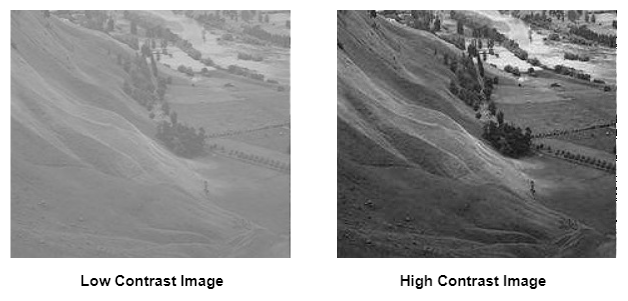

If we were to plot the image histograms, it would look something like below -

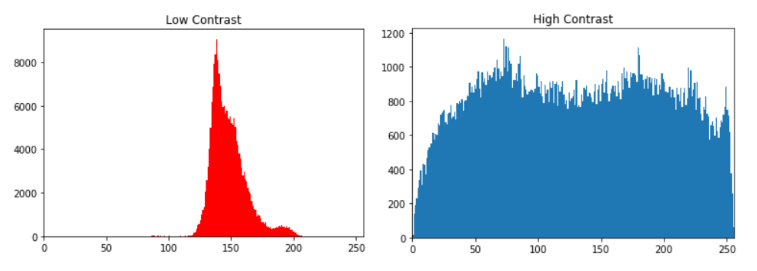

**Importance of Histogram Equalization**
*   This method works better for both bright and dark images, especially in the field of medical science there is higher importance in analyzing the X-ray images.
*   It is also very useful in viewing scientific images like thermal images and satellite images.

**Code Implementation**

Import the Libraries


In [1]:
import numpy as np 
import cv2
import json
from matplotlib import pyplot as plt

Read the Image

In [2]:
def read_this(image_file, gray_scale=False):
  image_src=cv2.imread(image_file)
  if gray_scale:
    image_src= cv2.cvtColor(image_src,cv2.COLOR_BGR2GRAY)
  else:
    image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)

  return image_src

The above function reads the image either in gray_scale or RGB and returns the image matrix.

**Code Implementation with Library**



For equalizing, we can simply use the equalizeHist() method available in the library cv2. We have two aspects here -

1.   When the image is read in RGB

*  Separate the pixels based on the color combination. We can use the split() method available in the library cv2.
*  Apply the equalization method for each matrix.
*   Merge the equalized image matrices altogether with the method merge() available in the library cv2.


2.   When the image is read in gray_scale
3. Plot the original image and equalized image.


In [3]:
def equalize_this(image_file, with_plot=False, gray_scale=False):
  image_src= read_this(image_file=image_file, gray_scale=gray_scale)
  if not gray_scale:
    r_image, g_image, b_image= cv2.split(image_src)

    r_image_eq=cv2.equalizeHist(r_image)
    g_image_eq=cv2.equalizeHist(g_image)
    b_image_eq=cv2.equalizeHist(b_image)

    image_eq=cv2.merge((r_image_eq, g_image_eq, b_image_eq))
    cmap_val=None
  else:
    image_eq=cv2.equalizeHist(image_src)
    cmap_val='gray'

  if with_plot:
    fig=plt.figure(figsize=(10,20))

    ax1=fig.add_subplot(2,2,1)
    ax1.axis('off')
    ax1.title.set_text('original')
    ax2=fig.add_subplot(2,2,2)
    ax2.axis('off')
    ax2.title.set_text('Equalized')

    ax1.imshow(image_src, cmap=cmap_val)
    ax2.imshow(image_eq,cmap=cmap_val)
    return True

  return image_eq

True

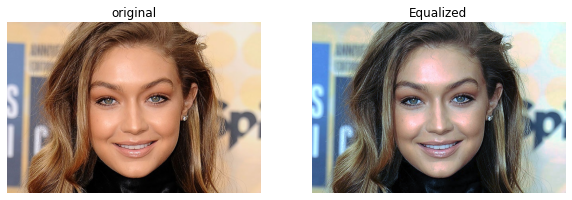

In [4]:
equalize_this(image_file='/content/gigihadid.jpg', with_plot=True)

True

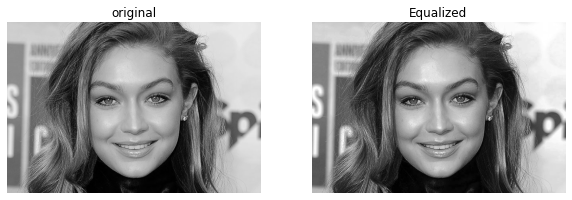

In [5]:
equalize_this(image_file='/content/gigihadid.jpg', with_plot=True, gray_scale=True)

The above plots are clear and we can say that the equalized images look better than the original images. This was implemented using the cv2 library.

**Code Implementation from Scratch**

For this, I am using NumPy for all the matrix operations. Again we can do it with for loops, but it will take more time to compute. Even here we have two aspects as before -

1.   When the image is read in RGB.
*   Separate the pixels based on the color combination. We can slice it down using NumPy operations.
*   Apply the equalization method for each matrix.
*   Merge the equalized image matrices altogether with the method dstack(tup=()) available in the library NumPy.
2. When the image is read in gray_scale.
3. Plot the original image and equalized image.

Let’s write our own function to compute the image equalization. Image pixel values are normally in the range of 0 to 255. So in total, we will have 256 pixels.


In [6]:
def enchance_contrast(image_matrix, bins=256):
  image_flattened=image_matrix.flatten()
  image_hist=np.zeros(bins)

  #frequency count of each pixel
  for pix in image_matrix:
    image_hist[pix] += 1

  #cummulative sum
  cum_sum = np.cumsum(image_hist)
  norm = (cum_sum - cum_sum.min())*255

  #normalization of the pixel values
  n_ = cum_sum.max() - cum_sum.min()
  uniform_norm = norm / n_
  uniform_norm = uniform_norm.astype('int')

  #flat histogram
  image_eq = uniform_norm[image_flattened]

  #reshaping the flattened matrix to its original shape
  image_eq=np.reshape(a=image_eq, newshape=image_matrix.shape)

  return image_eq

The above function returns an equalized image matrix when passed the original image matrix as an argument.

Let’s write another function that computes the equalization for both the RGB image and the gray_scale image taking the above function in use.


In [11]:
def equalize_this(image_file,with_plot=False,gray_scale=False,bins=256):
  image_src=read_this(image_file=image_file,gray_scale=gray_scale)
  if not gray_scale:
    r_image=image_src[:,:,0]
    g_image=image_src[:,:,1]
    b_image=image_src[:,:,2]

    r_image_eq = enchance_contrast(image_matrix=r_image)
    g_image_eq = enchance_contrast(image_matrix=g_image)
    b_image_eq = enchance_contrast(image_matrix=b_image)
    
    image_eq=np.dstack(tup=(r_image_eq,g_image_eq,b_image_eq))
    cmap_val = None

  else:
    image_eq = enchance_contrast(image_matrix=image_src)
    cmap_val = 'gray'

  if with_plot:
      fig = plt.figure(figsize=(10, 20))

      ax1 = fig.add_subplot(2, 2, 1)
      ax1.axis("off")
      ax1.title.set_text('Original')
      ax2 = fig.add_subplot(2, 2, 2)
      ax2.axis("off")
      ax2.title.set_text("Equalized")

      ax1.imshow(image_src, cmap=cmap_val)
      ax2.imshow(image_eq, cmap=cmap_val)
      return True
  return image_eq

True

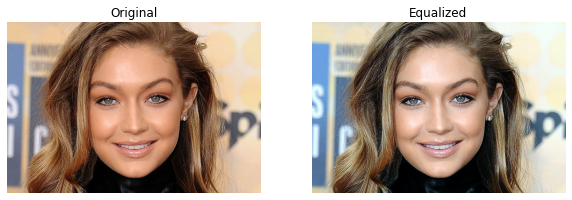

In [12]:
equalize_this(image_file='/content/gigihadid.jpg', with_plot=True)

True

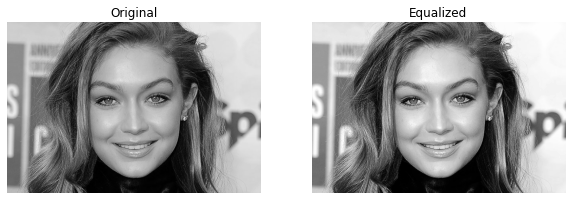

In [13]:
equalize_this(image_file='/content/gigihadid.jpg', with_plot=True, gray_scale=True)

The above plots are clear and we can say that the equalized images look better than the original images. This was implemented from scratch using the NumPy library.